In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

In [10]:
#me traigo el dataset de entrenamiento

diamonds= pd.read_csv('./../data/diamonds_train.csv')

diamonds.head()

,Index_ID,Clarity,Color,Cut,Depth,x,y,z,Table,Price,City,Carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,VS2,J,Premium,62.4,6.83,6.79,4.25,58.0,4268,Dubai,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,VS2,H,Very Good,63.0,4.35,4.38,2.75,57.0,505,Kimberly,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,VS1,G,Fair,65.5,5.62,5.53,3.65,55.0,2686,Las Vegas,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,SI1,D,Good,63.8,4.68,4.72,3.00,56.0,738,Kimberly,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,SI1,G,Ideal,60.5,6.55,6.51,3.95,59.0,4882,Dubai,1.02


<AxesSubplot:xlabel='Price', ylabel='Carat'>

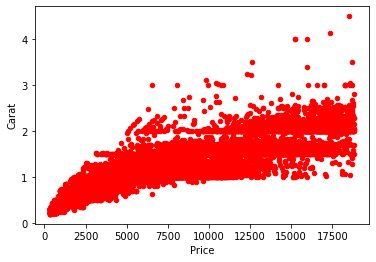

In [11]:
diamonds.plot(kind='scatter',x='Price', y='Carat',color='red')

In [12]:
#creo la columna xyz
diamonds['xyz'] = diamonds['x'] * diamonds['y']*diamonds['z']
diamonds.head()

,Index_ID,Clarity,Color,Cut,Depth,x,y,z,Table,Price,City,Carat,xyz
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,VS2,J,Premium,62.4,6.83,6.79,4.25,58.0,4268,Dubai,1.21,197.096725
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,VS2,H,Very Good,63.0,4.35,4.38,2.75,57.0,505,Kimberly,0.32,52.395750
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,VS1,G,Fair,65.5,5.62,5.53,3.65,55.0,2686,Las Vegas,0.71,113.436890
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,SI1,D,Good,63.8,4.68,4.72,3.00,56.0,738,Kimberly,0.41,66.268800
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,SI1,G,Ideal,60.5,6.55,6.51,3.95,59.0,4882,Dubai,1.02,168.429975


In [13]:
#x,y, z, carat están muy correlacionadas
diamonds.corr()

,Depth,x,y,z,Table,Price,Carat,xyz
Depth,1.000000,-0.026348,-0.030966,0.094655,-0.293114,-0.014864,0.026528,0.006721
x,-0.026348,1.000000,0.973712,0.984876,0.196059,0.885848,0.975688,0.952303
y,-0.030966,0.973712,1.000000,0.964828,0.184673,0.866163,0.951667,0.977860
z,0.094655,0.984876,0.964828,1.000000,0.155189,0.874500,0.967570,0.953983
Table,-0.293114,0.196059,0.184673,0.155189,1.000000,0.130111,0.183392,0.168437
Price,-0.014864,0.885848,0.866163,0.874500,0.130111,1.000000,0.921935,0.898684
Carat,0.026528,0.975688,0.951667,0.967570,0.183392,0.921935,1.000000,0.971851
xyz,0.006721,0.952303,0.977860,0.953983,0.168437,0.898684,0.971851,1.000000


In [14]:
# como carat es la mas correlacionada con el precio me quedo con ella
reduced= ['Carat', 'Cut','City','Color', 'Table', 'Depth', 'xyz', 'Price' ]
diamonds_reduced= diamonds[reduced]
diamonds_reduced.head()

,Carat,Cut,City,Color,Table,Depth,xyz,Price
0,1.21,Premium,Dubai,J,58.0,62.4,197.096725,4268
1,0.32,Very Good,Kimberly,H,57.0,63.0,52.395750,505
2,0.71,Fair,Las Vegas,G,55.0,65.5,113.436890,2686
3,0.41,Good,Kimberly,D,56.0,63.8,66.268800,738
4,1.02,Ideal,Dubai,G,59.0,60.5,168.429975,4882


In [15]:
diamonds_clean= diamonds[diamonds['xyz']!=0]
len(diamonds_clean)



40439

In [16]:
df3= diamonds_clean [ (diamonds_clean['Price'] <1000)& (diamonds_clean['x']<7)& (diamonds_clean['x']>6)]

diamonds_clean.drop(df3.index, inplace = True)

/Users/Izaskun/miniconda3/envs/machine/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:xlabel='Price', ylabel='x'>

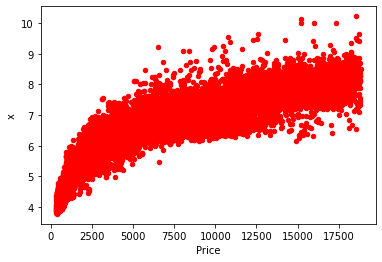

In [17]:
diamonds_clean.plot(kind='scatter',x='Price', y='x',color='red')

In [18]:
X_train_original= diamonds_clean [['Carat', 'Cut','City','Color', 'Table', 'Depth', 'xyz' ]]
y= diamonds_clean['Price']

In [19]:
X_train_dummies= pd.get_dummies(X_train_original)

scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train_dummies)

X= X_train_scaled 
y= diamonds['Price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [40438, 40455]

In [21]:
model1 = LinearRegression()
model2 = linear_model.Lasso()
model3 = ElasticNet()
model4 = Ridge()
#mode5 = SVR()
model6 = SGDRegressor()



model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
rmse1 = mean_squared_error(y_test, y_pred1)**0.5

model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
rmse2 = mean_squared_error(y_test, y_pred2)**0.5

model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
rmse3 = mean_squared_error(y_test, y_pred3)**0.5

model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
rmse4 = mean_squared_error(y_test, y_pred4)**0.5

model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
rmse6 = mean_squared_error(y_test, y_pred6)**0.5





print('rmse1 LinearRegression', rmse1)
print('rmse2 linear_model.Lasso', rmse2)
print('rmse3 ElasticNet', rmse3)
print('rmse4 Ridge', rmse4)
print('rmse6 SGDRegressor', rmse6)


NameError: name 'X_train' is not defined

In [22]:
model7= RandomForestRegressor(max_depth=12)
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
rmse7 = mean_squared_error(y_test, y_pred7)**0.5

print('rmse7 RandomForestRegressor', rmse7)

NameError: name 'X_train' is not defined

In [23]:
model8= ExtraTreesRegressor(n_estimators=15)
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)
rmse8 = mean_squared_error(y_test, y_pred8)**0.5

print('rmse8 ExtraTreesRegressor', rmse8)

NameError: name 'X_train' is not defined

In [ ]:
# creo el csv en el formato que hay que subirlo
submission = pd.DataFrame({'id': test_df['id'] , 'price': y_pred})
submission.to_csv('submission.csv',index=False)